In [3]:
# Draw a dendogram if possible

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [6]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


#Birch does not scale well in high dimensions
#n_clusters=n_clusters,

In [8]:
n_clusters = 10

## Parameter Grid Search 

In [9]:
branching_factors = [10, 20, 30, 40, 50 ,60, 70, 80, 90, 100]
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
#min_df_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [10]:
def grid_search(logs, labels_, gram, min_df):
    
    result_header = ["Branching Factor", "Threshold", "VMeasure", "Fowlkes-Mallows"]
    results = []
    
    X = get_features(logs, gram, min_df)
    X = X.toarray()

    idxs = np.where(np.all(X == 0, axis=1))

    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)
        
    for bf in branching_factors:
        for thres in thresholds: 
            model = Birch(n_clusters=n_clusters, branching_factor=bf, threshold=thres, compute_labels=True)
            model.fit(X)

            labels = model.labels_

            vm = evaluate_vmeasure(labels_, labels)
            fm = evaluate_fm(labels_, labels)

            result = [bf, thres, vm, fm]
            results.append(result)

            tab_results(result_header, results) 
                
    tab_results(result_header, results)   

In [11]:
grid_search(logs, log_labels, 2, 70)

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
+------------------+-----------+---------------------+---------------------+
+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
+------------------+-----------+---------------------+---------------------+
+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    | 0.18018967989399082 | 0.41070930430349556 |
|        10        |    0.2    |  0.1761630260607298 |  0.4032427641790814 |
|        10        |    0.3    | 0.31176219326735266 |  0.4649048836446164 |
|        10        |    0.4    | 0.29989200027527524 |  0.4723902512703485 |
|        10        |    0.5    |  0.3214630199825225 |  0.4790614475900229 |
|        20        |    0.1    | 0.14598456829251757 |  0.3999421025624106 |
|        20        |    0.2    |  0.1780289913825503 | 0.40354745652812135 |
|        20        |    0.3    | 0.29566471262761235 |  0.466257222557039  |
|        20        |    0.4    |  0.2850361226655496 |  0.481071177365172  |
|        20        |    0.5    |  0.2861039127097978 |  0.414272832665928  |

In [12]:
grid_search(logs, log_labels, 3, 90)

+------------------+-----------+-------------------+--------------------+
| Branching Factor | Threshold |      VMeasure     |  Fowlkes-Mallows   |
+------------------+-----------+-------------------+--------------------+
|        10        |    0.1    | 0.141162428444835 | 0.4012001183691944 |
+------------------+-----------+-------------------+--------------------+
+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.141162428444835  | 0.4012001183691944 |
|        10        |    0.2    | 0.1544326838926526 | 0.3951012983711706 |
+------------------+-----------+--------------------+--------------------+
+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+------

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

+------------------+-----------+---------------------+---------------------+
| Branching Factor | Threshold |       VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+---------------------+---------------------+
|        10        |    0.1    |  0.141162428444835  |  0.4012001183691944 |
|        10        |    0.2    |  0.1544326838926526 |  0.3951012983711706 |
|        10        |    0.3    | 0.17943481462272373 | 0.41982299642863086 |
|        10        |    0.4    | 0.13720282671027842 |  0.3970403238898733 |
|        10        |    0.5    | 0.16979323749133357 |  0.4048929475370314 |
|        20        |    0.1    | 0.14208607959959868 |  0.3947456973360457 |
|        20        |    0.2    |  0.1944707552349202 |  0.4231853707065764 |
|        20        |    0.3    | 0.13576061854637467 |  0.399592802247291  |
|        20        |    0.4    |  0.1115834568514794 | 0.39135928775392026 |
|        20        |    0.5    |  0.2077939350906521 | 0.42420912820506956 |

## Bigram Feature Vectorizer

In [13]:
eval_results = []

In [14]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [15]:
model = Birch(n_clusters=n_clusters, branching_factor=70, threshold=0.5, compute_labels=True)
Y = model.fit_transform(X)

In [16]:
Y.shape

(10689, 98)

In [17]:
results = evaluate_clustering('Birch Bigram Clustering', X, labels_, model.labels_)
print(results)

['Birch Bigram Clustering', '0.58', '0.16', '0.25', '0.10', '0.25', '0.38']


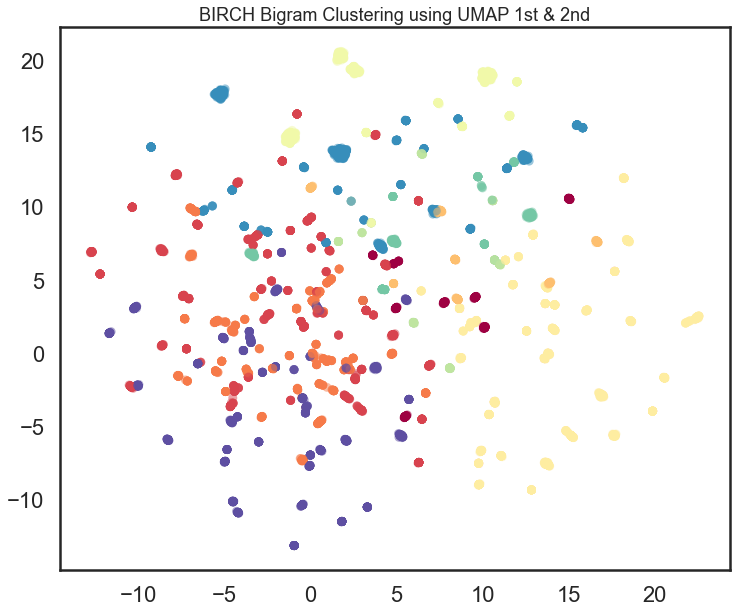

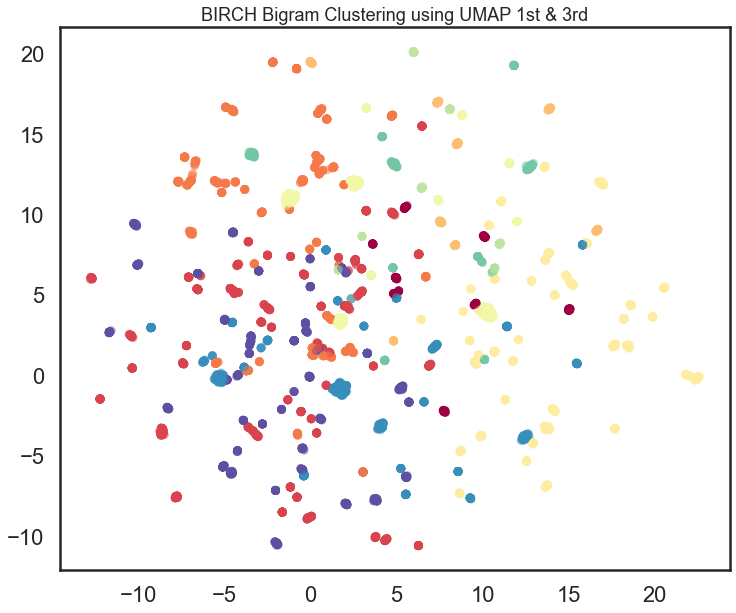

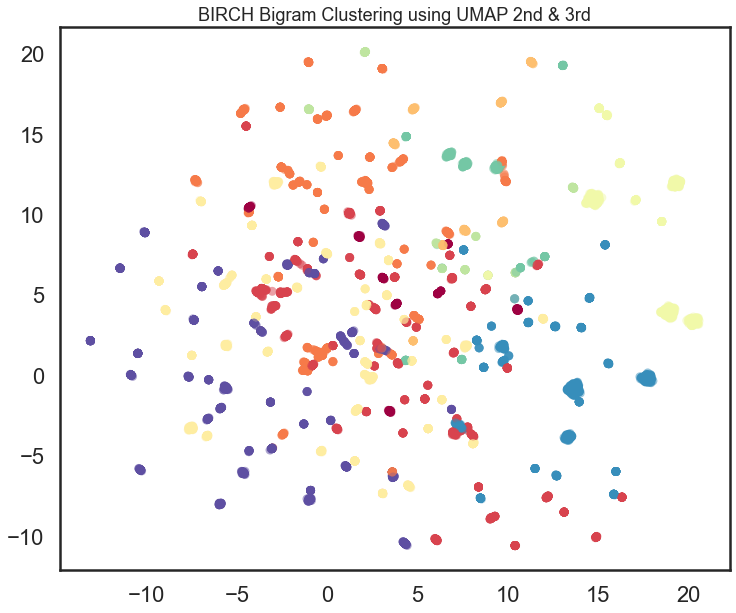

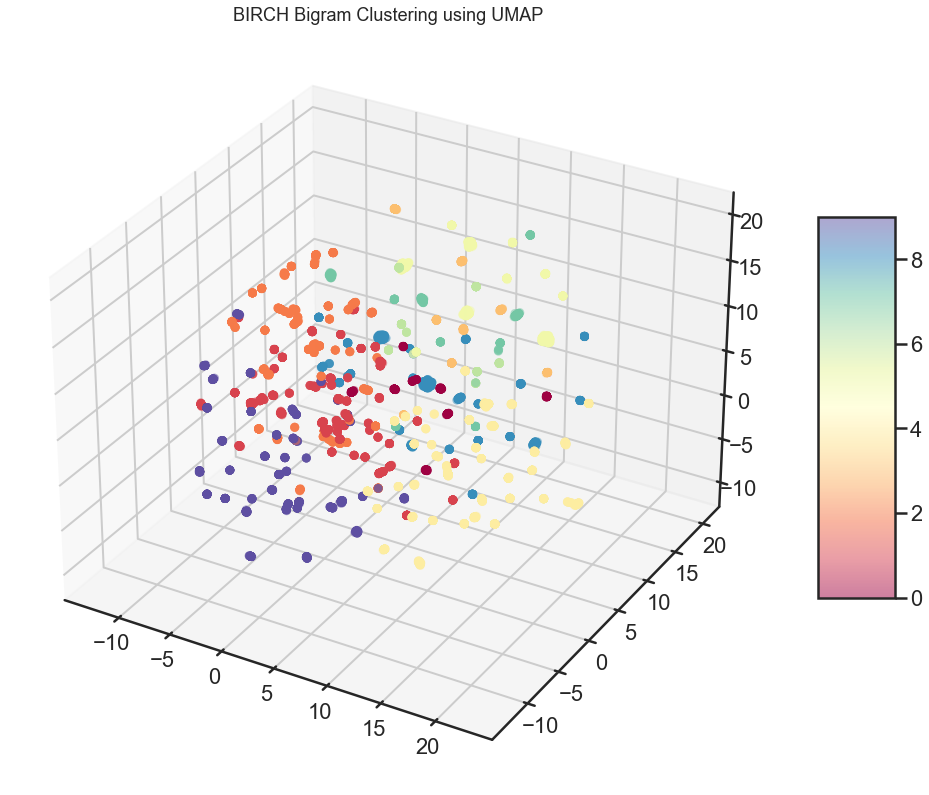

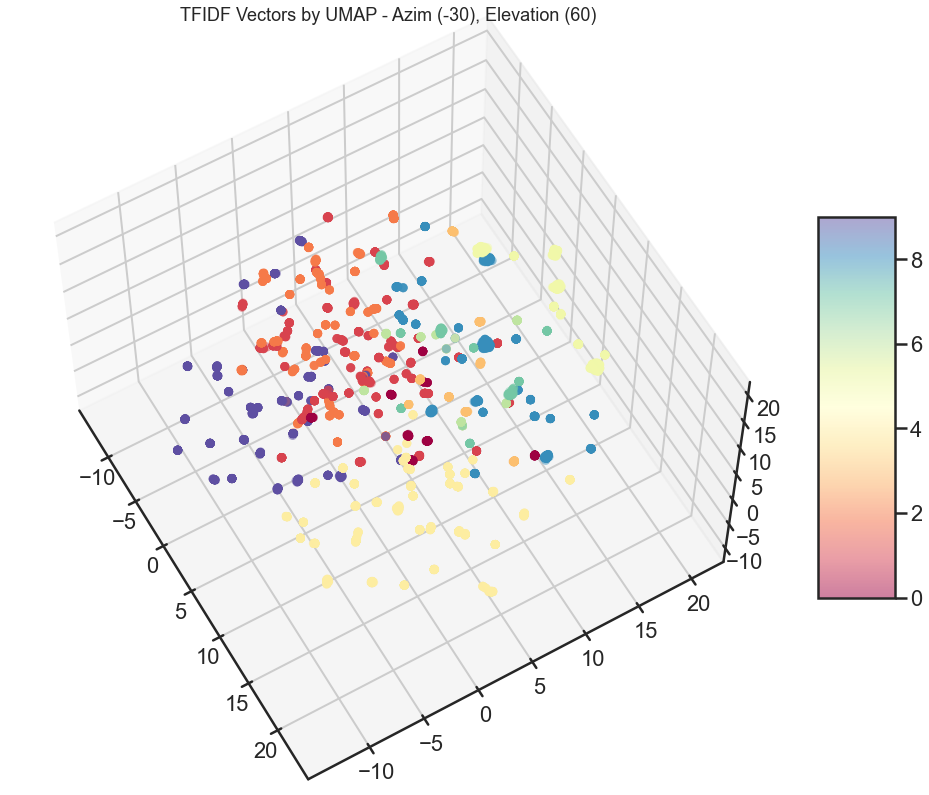

In [18]:
plot_clusters("BIRCH Bigram Clustering using UMAP", X, model.labels_)

In [19]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [20]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [21]:
model = Birch(n_clusters=n_clusters, branching_factor=100, threshold=0.5, compute_labels=True)
Y = model.fit_transform(X)

In [22]:
Y.shape

(10640, 126)

In [23]:
results = evaluate_clustering('Birch Trigram Clustering', X, labels_, model.labels_)
print(results)

['Birch Trigram Clustering', '0.71', '0.22', '0.33', '0.19', '0.33', '0.49']


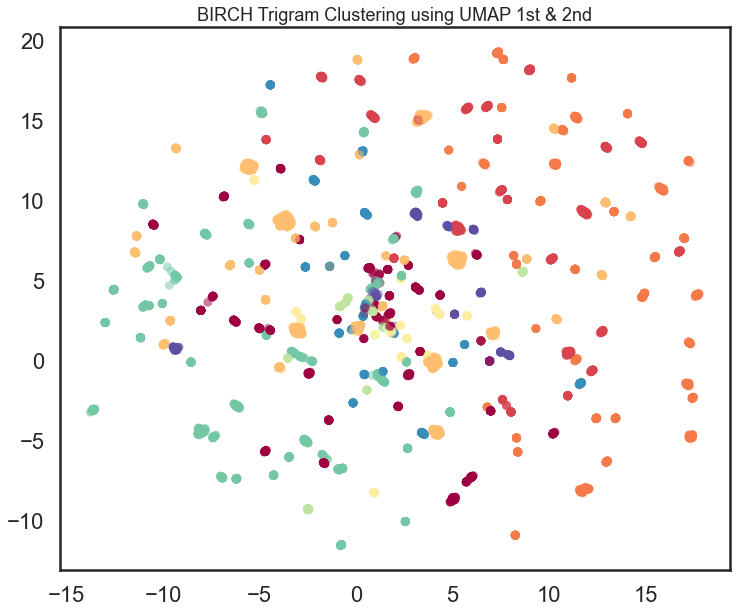

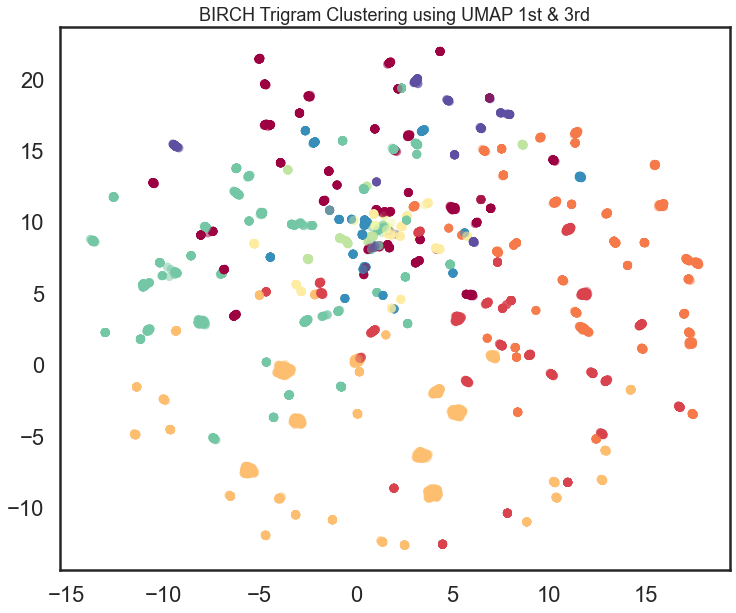

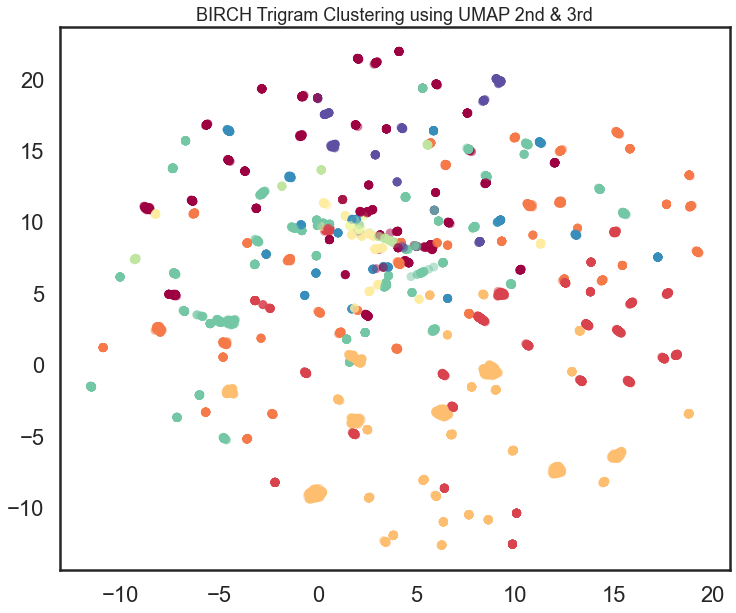

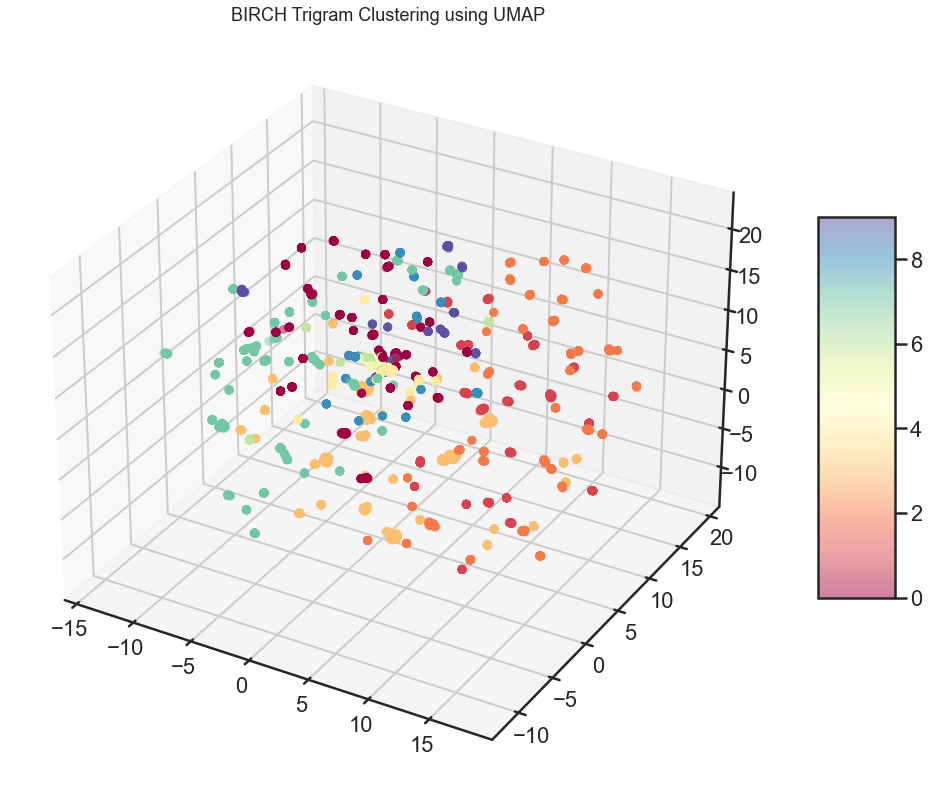

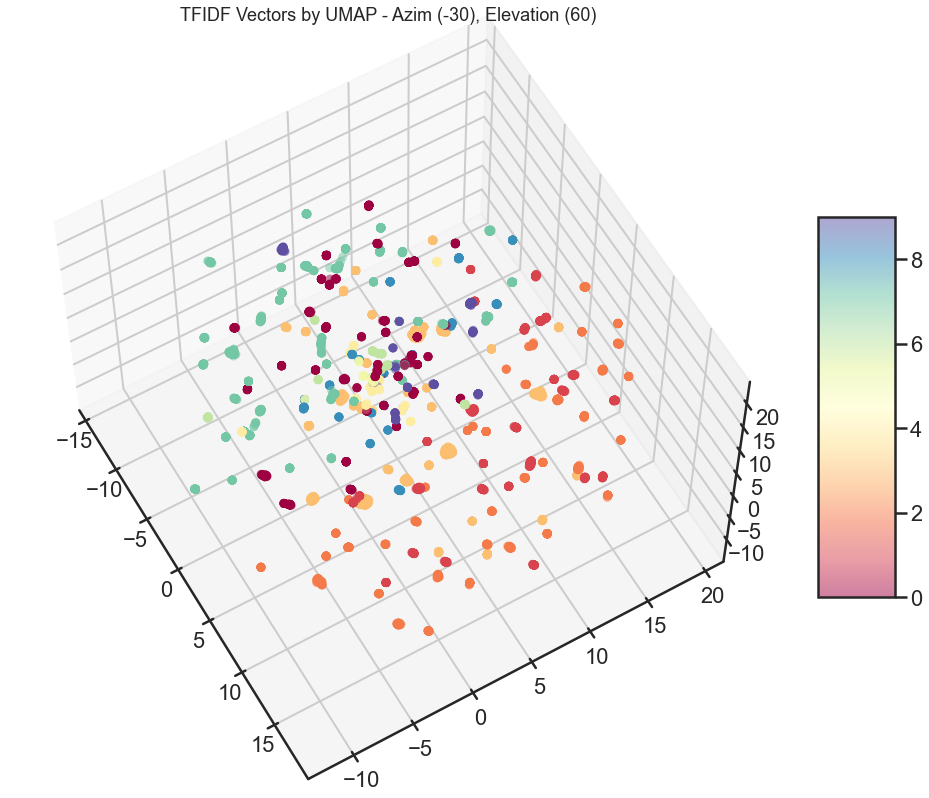

In [24]:
plot_clusters("BIRCH Trigram Clustering using UMAP", X, model.labels_)

In [25]:
eval_results.append(results)